# Importing Data and Basic Pre-Processing

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 618 kB/s 


In [3]:
# df = pd.read_excel("../input/auto-eval/Tutorial 1_corrected(1-1174).xlsx", "Q8", usecols = [3, 6, 7, 8] ,engine="openpyxl")
# df = pd.read_excel("../input/tutorial-1-corrected/Tutorial 1_corrected(1-1174).xlsx", "Q7", usecols = [5, 6, 7, 8, 9], engine = 'openpyxl')
df = pd.read_excel("../input/plagiarismremovedpsat/plaigiarism removed.xlsx", "q7 end sem", usecols = [1,2,3,4,5], names = ['MCQ Response', 'Rationale', 'Total', 'MCQ Points', 'Rationale Points'], engine = 'openpyxl')

In [4]:
df.head()

,MCQ Response,Rationale,Total,MCQ Points,Rationale Points
0,In Row1 : 2 and Row 2: 3,The computational corner stone appropriate for...,2.0,1.5,0.5
1,In Row1 : 2 and Row 2: 3,Pattern recognition is the computation corner ...,2.0,1.5,0.5
2,In Row1 : 2 and Row 2: 3,The computational cornerstone used here is pat...,2.0,1.5,0.5
3,In Row1 : 2 and Row 2: 3,The computational corner stone appropriate for...,2.0,1.5,0.5
4,In Row1 : 2 and Row 2: 4,"In row1:2 since 4,1 cannot be placed due to re...",1.0,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MCQ Response      308 non-null    object 
 1   Rationale         308 non-null    object 
 2   Total             308 non-null    float64
 3   MCQ Points        308 non-null    float64
 4   Rationale Points  308 non-null    float64
dtypes: float64(3), object(2)
memory usage: 12.2+ KB


In [6]:
# df['Points - Question 11 - CO4.1'].unique()
# df['Rationale Points(1.5)'].unique()

In [7]:
df["Rationale"].replace(0, np.nan, inplace = True)
# df["Give explanation for Question 7 here:"].replace(0, np.nan, inplace = True)
x = df.dropna()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MCQ Response      308 non-null    object 
 1   Rationale         308 non-null    object 
 2   Total             308 non-null    float64
 3   MCQ Points        308 non-null    float64
 4   Rationale Points  308 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.4+ KB


In [8]:
x['Column1_lower'] = x['Rationale'].astype(str).str.lower().str.strip()
# duplicates = x.duplicated(subset='Column1_lower')
# duplicates.describe()

In [9]:
y = x[x.duplicated(subset='Column1_lower')]
len(y)

80

In [10]:
# print(y.loc[1123]['Give explanation for Question 7 here:'])
# print(y.loc[1012]['Give explanation for Question 7 here:'])
len(y)

80

In [11]:
x.drop_duplicates(subset = 'Column1_lower', keep = 'first', inplace = True)
x.drop('Column1_lower', axis=1, inplace=True)
x.reset_index(inplace=True, drop=True)

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MCQ Response      228 non-null    object 
 1   Rationale         228 non-null    object 
 2   Total             228 non-null    float64
 3   MCQ Points        228 non-null    float64
 4   Rationale Points  228 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.0+ KB


In [13]:
# x['Points - Question 11 - CO4.1'] = x['Points - Question 11 - CO4.1'] - (x['Points - Question 11 - CO4']/2)
# # # x['Points - Question 12 - CO4.1'] = x['Points - Question 12 - CO4.1'] - 1.5
# # # x.loc[df['Points - Question 12 - CO4.1'] < 0, 'Points - Question 12 - CO4.1'] = 0
# # # x.sample(5)
# x['Points - Question 11 - CO4.1'].unique()

In [14]:
# x["Points - Question 11 - CO4.1"].replace(-1.5, np.nan, inplace = True)
# x = x.dropna()
# x['Points - Question 11 - CO4.1'].unique()

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MCQ Response      228 non-null    object 
 1   Rationale         228 non-null    object 
 2   Total             228 non-null    float64
 3   MCQ Points        228 non-null    float64
 4   Rationale Points  228 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.0+ KB


In [16]:
# x['Points - Question 12 - CO4.1'].unique()

In [17]:
# x.groupby('Points - Question 11 - CO4.1').count()
x.groupby('Rationale Points').count()
#x.groupby('Rationale Points(1.5)').count()

,MCQ Response,Rationale,Total,MCQ Points
Rationale Points,,,,
0.0,11,11,11,11
0.5,170,170,170,170
1.0,19,19,19,19
1.5,28,28,28,28


In [18]:
# a = x[x['Rationale Points(1.5)'] == 0.5]
# b = x[x['Rationale Points(1.5)'] == 1.5]
# c = x[x['Rationale Points(1.5)'] == 1.0]
# d = x[x['Rationale Points(1.5)'] == 0.0].sample(100)

# x = pd.concat([a,b,c,d])
# # x.head()

# x = x.sample(frac=1)
# x.head()

In [19]:
# x.info()

### I refrained from most text pre-processing steps because
### 1. Stop word removal - words like "and", "for", "while" hold meaning in a computer science context
### 2. Lowercasing - could change the representation of variables - i is different from I
### 3. Lemmatization - could be done but since none of the other steps for words have been performed it wouldnt make much of a difference

In [20]:

x_original = pd.DataFrame(x)


In [21]:
x_original.shape

(228, 5)

# Text Vectorization - BERT

In [22]:
import torch
import transformers as ppb
import warnings
# import csv
warnings.filterwarnings('ignore')

## Text-Vectors using TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(ngram_range = (1, 3))

In [25]:
tf_idf_tokens = vectorizer.fit_transform(x['Rationale'])

In [26]:
# # For DistilBERT:
# ###### We're using DistilBERT. DistilBERT is a smaller version of BERT developed and open sourced by the team at HuggingFace. 
# #It’s a lighter and faster version of BERT that roughly matches its performance.
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# ## Want BERT instead of distilBERT? Uncomment the following line:
# #model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# # Load pretrained model/tokenizer
# tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
# model = model_class.from_pretrained(pretrained_weights)

In [27]:
# tokenized_text = x['Rationale'].apply((lambda y: tokenizer.encode(y, add_special_tokens=True))) 
# #print(tokenized_text)
# max_len = 0
# for i in tokenized_text.values:
#   if len(i) > max_len:
#     max_len = len(i)

# padded_text = np.array([i + [0]*(max_len-len(i)) for i in tokenized_text.values])
# print(np.array(padded_text).shape)

# attention_mask_text = np.where(padded_text != 0, 1, 0)
# print(attention_mask_text.shape)

In [28]:
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# input_ids_text = torch.tensor(padded_text)  
# att_mask_text = torch.tensor(attention_mask_text)  

# text_data = TensorDataset(input_ids_text, att_mask_text)
# text_dataloader = DataLoader(text_data,batch_size=32)

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
print(device)
print(n_gpu)
torch.cuda.get_device_name(0)

cuda
1


'Tesla P100-PCIE-16GB'

In [30]:
# features_text = []
# for step, batch in enumerate(text_dataloader):
#     # Add batch to GPU
#     batch = tuple(t.to(device) for t in batch)
#     # Unpack the inputs from our dataloader
#     input_ids_text, attention_mask_text = batch
#     # Get the features
#     model.to(device)
#     with torch.no_grad():
#         last_hidden_states = model(input_ids_text, attention_mask=attention_mask_text)
#     features_text_batch = (last_hidden_states[0][:,0,:]).detach().cpu().numpy()  
#     print(features_text_batch.shape)
#     #append to the feature vector
#     features_text.append(features_text_batch)

In [31]:
# SAMPLES = np.asarray(features_text).shape[0]
# BATCH_SIZE = 32

In [32]:
#np.asarray(features_text).shape

In [33]:
#print(features_text[28].shape)

In [34]:
# features_text_2 = []
# for i in range(7):
#     for j in range(32):
#         features_text_2.append(features_text[i][j])
# try:    
#     for j in range(4): #26
#         features_text_2.append(features_text[7][j])
# except:
#     pass

In [35]:
# len(features_text_2)

In [36]:
text_vec = tf_idf_tokens

In [37]:
x.to_csv("plagcheckendsemq7.csv")

In [38]:
import pickle
pick_out = open("q7 endsem textvec", 'wb')
pickle.dump(text_vec, pick_out)
pick_out.close()

# Text Similarity Analysis

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
#let's calculate cosine similarity for sentence 0:
similarities = cosine_similarity(text_vec,text_vec)

In [40]:
similarities.shape

(228, 228)

In [41]:
similarities

array([[1.        , 0.56992547, 0.15485367, ..., 0.04675991, 0.00927456,
        0.02691174],
       [0.56992547, 1.        , 0.03300129, ..., 0.04200814, 0.00833208,
        0.02417695],
       [0.15485367, 0.03300129, 1.        , ..., 0.02441404, 0.00524005,
        0.08366143],
       ...,
       [0.04675991, 0.04200814, 0.02441404, ..., 1.        , 0.01277853,
        0.        ],
       [0.00927456, 0.00833208, 0.00524005, ..., 0.01277853, 1.        ,
        0.        ],
       [0.02691174, 0.02417695, 0.08366143, ..., 0.        , 0.        ,
        1.        ]])

In [42]:
print(np.mean(similarities))

0.04214997741724093


In [43]:
print(np.std(similarities))

0.08139599064065584


In [44]:
indices = []
for i in range(len(similarities)):
    avg = np.mean(similarities[i])
    if avg>= np.mean(similarities):
        indices.append(int(i))

In [45]:
len(indices)

106

In [46]:
#x.loc[801,:]

In [47]:
x.reset_index(inplace=True)
x.drop(indices, inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 3 to 227
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             122 non-null    int64  
 1   MCQ Response      122 non-null    object 
 2   Rationale         122 non-null    object 
 3   Total             122 non-null    float64
 4   MCQ Points        122 non-null    float64
 5   Rationale Points  122 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.7+ KB


In [48]:
x.groupby("Rationale Points").count()

,index,MCQ Response,Rationale,Total,MCQ Points
Rationale Points,,,,,
0.0,10,10,10,10,10
0.5,93,93,93,93,93
1.0,10,10,10,10,10
1.5,9,9,9,9,9


In [49]:
original = text_vec

In [50]:
array_vec = text_vec.todense()

In [51]:
new_vec = np.delete(np.array(array_vec), indices, axis = 0)
len(new_vec)

122

In [52]:
text_vec = new_vec

In [53]:
np.array(original).shape == np.array(text_vec).shape

False

# BIRCH

In [54]:
!pip install pyclustering
!pip install scikit-learn-extra
!pip install bert-extractive-summarizer
!pip install neuralcoref
!pip install spacy

!pip install fuzzy-c-means
!pip install kmodes

     |████████████████████████████████| 2.6 MB 625 kB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=15c6909c4974d4f79df934012f38f489c0dcd17e6228f580e95a5fca4da25882
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering
     |████████████████████████████████| 1.7 MB 637 kB/s 
     |████████████████████████████████| 286 kB 589 kB/s 
     |████████████████████████████████| 15.7 MB 204 kB/s 
     |████████████████████████████████| 82 kB 786 kB/s 
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1
  Attempting uninstall: typer
    Found existing installation: typer 0.4.0
    Uninstalling typer-0.4.0:
      Successfully uninstalled typer-0.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      

In [55]:
# !pip install som-learn
# from sklearn_som.som import SOM
# from somlearn import SOM
# som = SOM(n_columns=2, n_rows=2, random_state=1)
# #som.fit(text_vec.toarray())
# labels = som.fit_predict(text_vec)#.toarray())
# # predictions = som.predict(feature_vec)

In [56]:
x

,index,MCQ Response,Rationale,Total,MCQ Points,Rationale Points
3,3,In Row1 : 2 and Row 2: 4,"In row1:2 since 4,1 cannot be placed due to re...",1.0,0.0,1.0
8,8,In Row1 : 2 and Row 2: 3,"Pattern recognition, because we get the soluti...",2.0,1.5,0.5
10,10,In Row1 : 2 and Row 2: 3,it is similar to sudoko problem by pattern rec...,2.0,1.5,0.5
12,12,In Row1 : 2 and Row 2: 3,pattern recognition is the key to solve the qu...,3.0,1.5,1.5
13,13,In Row1 : 2 and Row 2: 3,for first row: if we see first row and first c...,2.0,1.5,0.5
...,...,...,...,...,...,...
211,211,In Row1 : 2 and Row 2: 3,only use the numbers 1 to 4_x000D_\nonly use e...,2.0,1.5,0.5
213,213,In Row1 : 2 and Row 2: 3,2 1 3 4 _x000D_\n1 4 2 3 _x000D_\n3 2 4 1 _x00...,3.0,1.5,1.5
225,225,In Row1 : 2 and Row 2: 3,The corner stone is Abstraction as the essenti...,1.5,1.5,0.0
226,226,In Row1 : 2 and Row 2: 3,2 1 3 4 _x000D_\n1 4 2 3_x000D_\n3 2 4...,2.0,1.5,0.5


With removed similar items

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 6992.0
Run 1, iteration: 2/100, moves: 0, cost: 6992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 6992.0
Run 2, iteration: 2/100, moves: 0, cost: 6992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11, cost: 6992.0
Run 3, iteration: 2/100, moves: 0, cost: 6992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11, cost: 6992.0
Run 4, iteration: 2/100, moves: 0, cost: 6992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 62, cost: 6992.0
Run 5, iteration: 2/100, moves: 0, cost: 6992.0
Best run was number 1


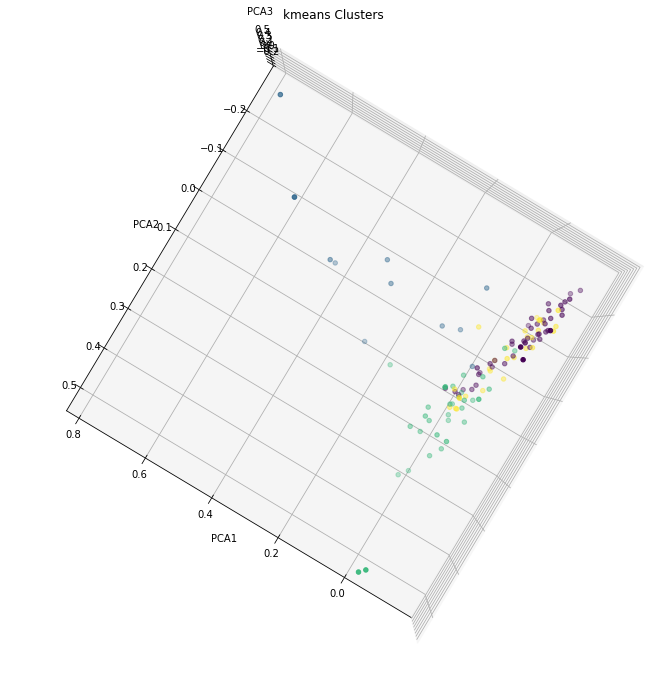

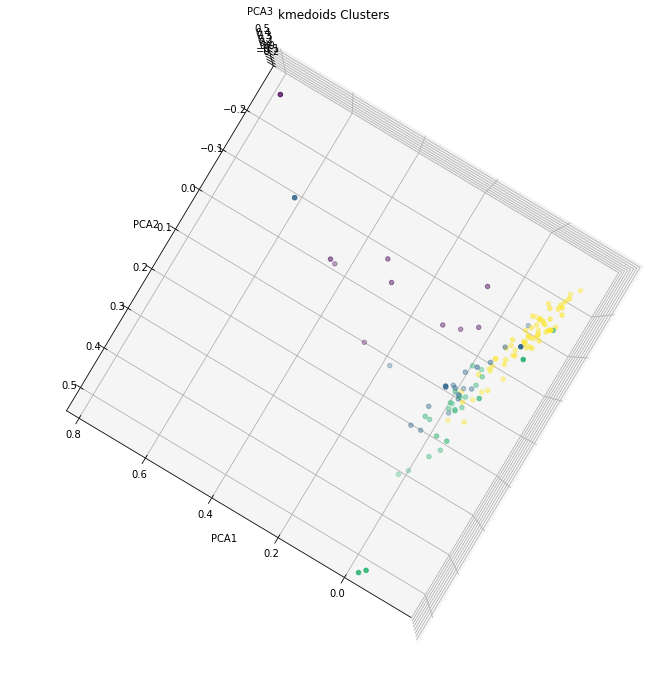

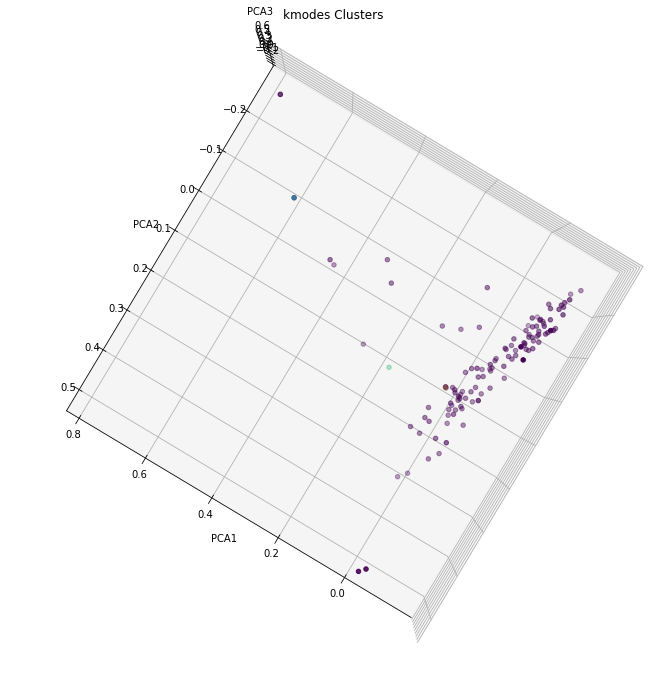

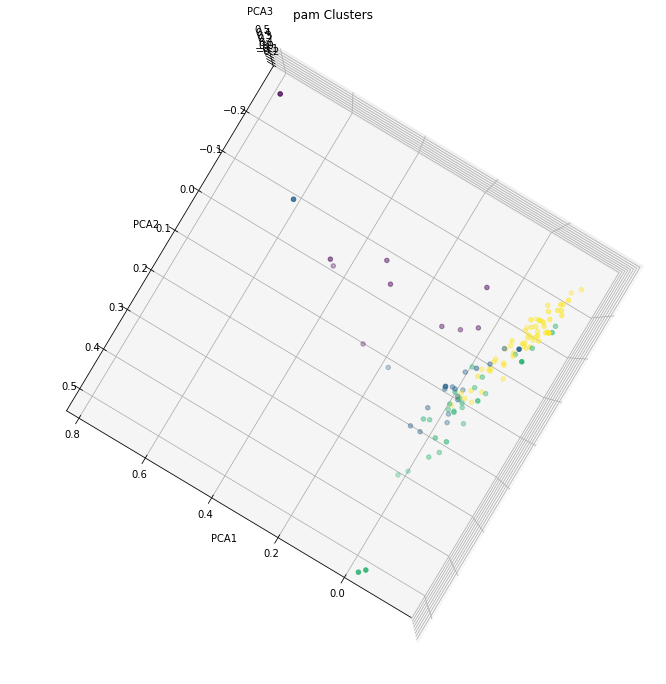

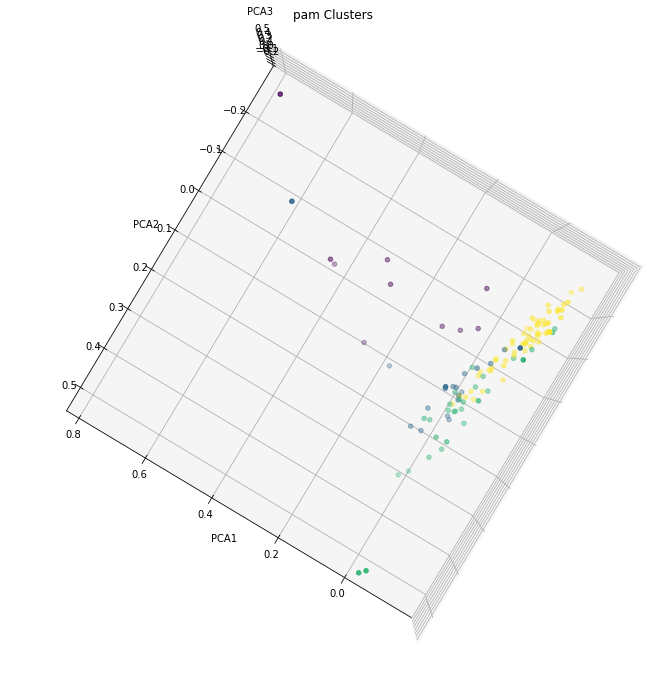

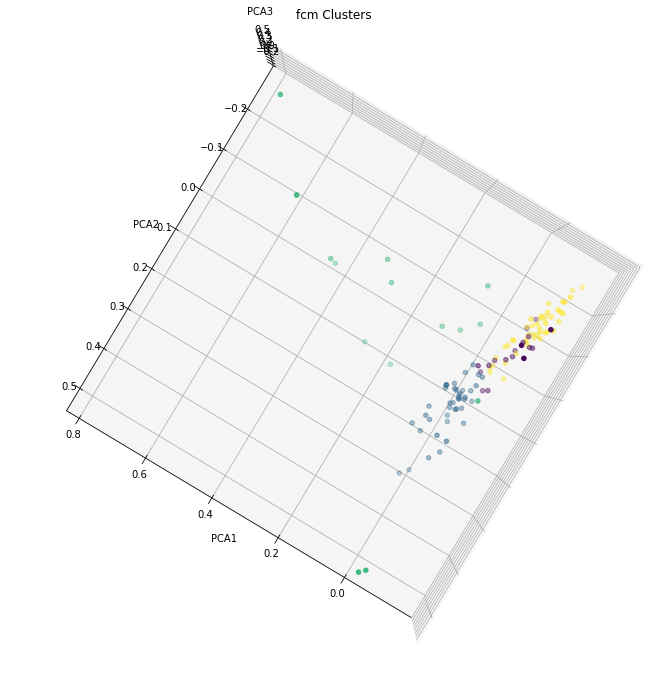

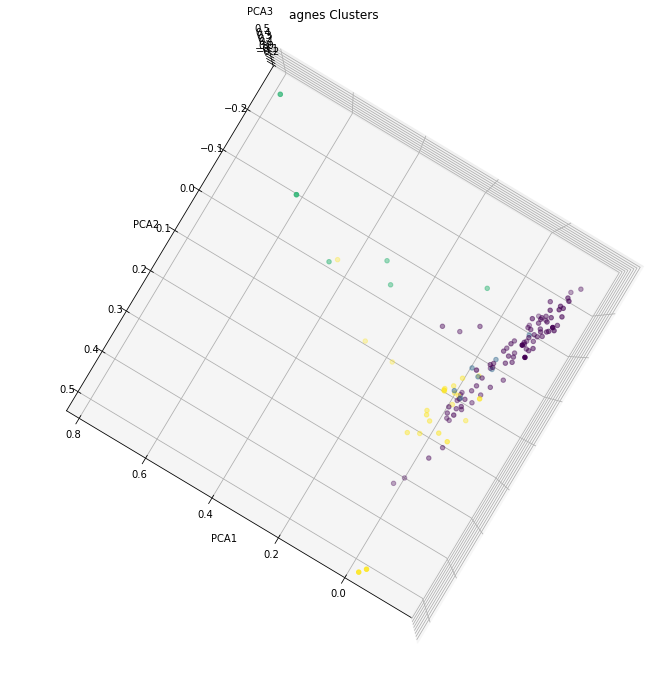

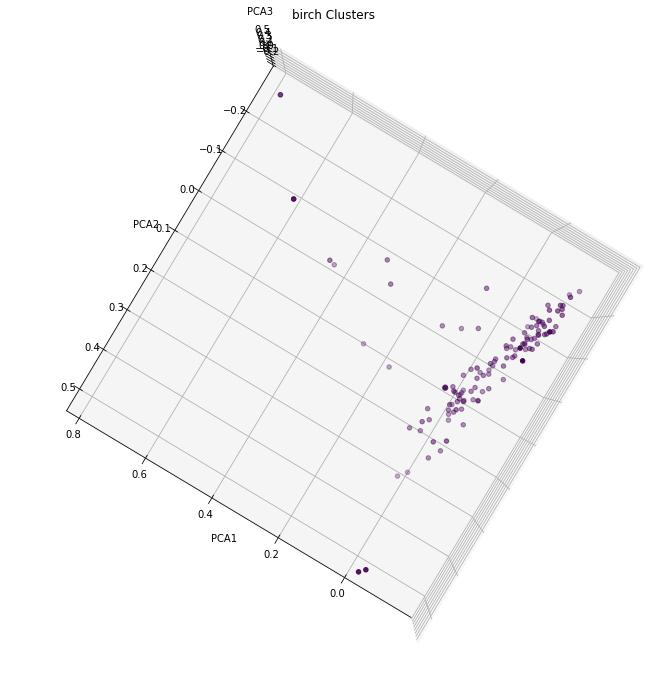

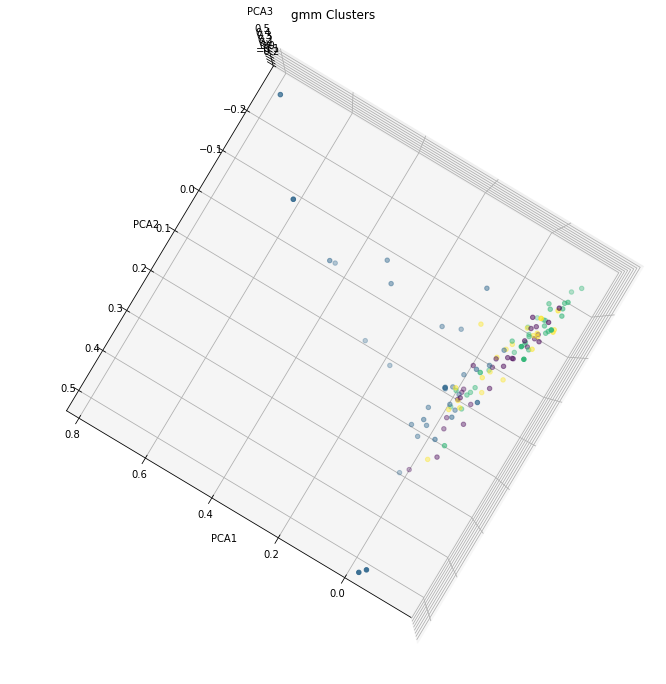

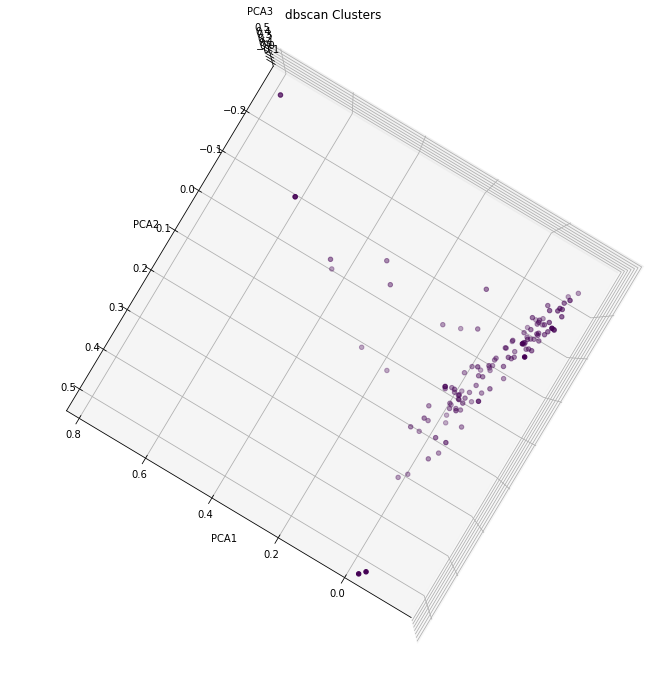

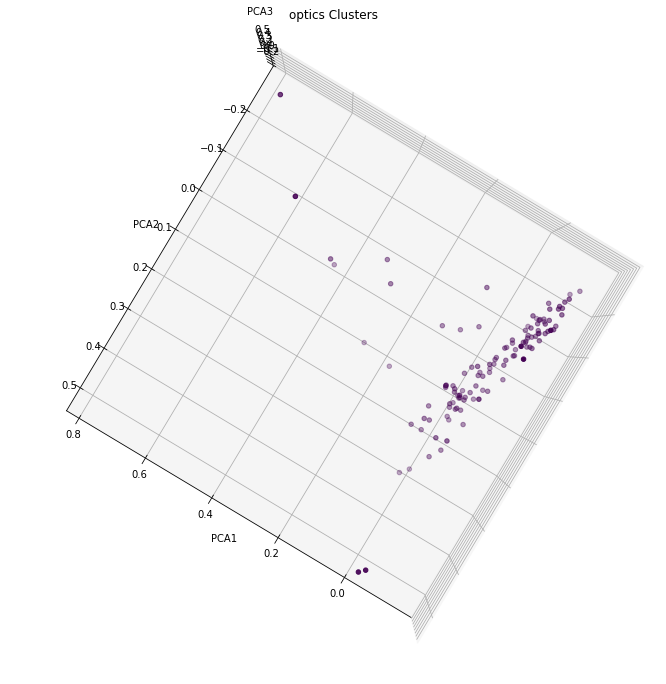

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from summarizer import Summarizer
from mpl_toolkits import mplot3d

model = Summarizer()

for i in range(11):
    if i == 0:
        title = "kmeans"
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=4, random_state=0).fit(text_vec)
        preds = kmeans.labels_
    if i == 1:
        title = "kmedoids"
        from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
        kmedoids = KMedoids(n_clusters=4, method = 'alternate' ,random_state=0).fit(text_vec)
        preds = kmedoids.labels_
    if i == 2:
        title = "kmodes"
        from kmodes.kmodes import KModes
        kmode = KModes(n_clusters=4, init = "Huang", n_init = 5, verbose=1)
        preds = kmode.fit_predict(text_vec)
    if i == 3:
        title = "pam"
        from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
        kmedoids = KMedoids(n_clusters=4, method = 'pam' ,random_state=0).fit(text_vec)
        preds = kmedoids.labels_
    if i == 5:
        title = "fcm"
        from fcmeans import FCM
        fcm = FCM(n_clusters=4)
        fcm.fit(np.array(text_vec))
        preds = fcm.predict(np.array(text_vec))
    if i == 6:
        title = "agnes"
        from sklearn.cluster import AgglomerativeClustering
        preds = AgglomerativeClustering(n_clusters=4,linkage='complete').fit_predict(text_vec)
    if i == 7:
        title = "birch"
        from sklearn.cluster import Birch  
        birch = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)
        birch.fit(text_vec)
        preds = birch.predict(text_vec)
    if i == 8:
        title = "gmm"
        from sklearn.mixture import GaussianMixture
        gmm = GaussianMixture(n_components=4)
        gmm.fit(text_vec)
        preds = gmm.predict(text_vec)
    if i == 9:
        title = "dbscan"
        from sklearn.cluster import DBSCAN
        preds = DBSCAN(eps=4.8, min_samples=10).fit_predict(text_vec)
    if i == 10:
        title = "optics"
        from sklearn.cluster import OPTICS
        preds = OPTICS(min_samples=5).fit_predict(text_vec)
    
    
    # reduce the features to 2D
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(text_vec)#.toarray())
    reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
    a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.scatter3D(a1, a2, a3, c=preds)
    ax.view_init(90, 120)
    plt.title(title + " Clusters")
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.savefig(title + '.png')
    
    x['labels_'+title] = preds
    # print(type(x))
    body1 = ''
    body2 = ''
    body3 = ''
    body4 = ''
    for i in range(len(x)):
        if x.iloc[i]['labels_'+title] == 0:
            body1 = body1 + " " + x.iloc[i]['Rationale']
        elif x.iloc[i]['labels_'+title] == 1:
            body2 = body2 + " " + x.iloc[i]['Rationale']
        elif x.iloc[i]['labels_'+title] == 2:
            body3 = body3 + " " + x.iloc[i]['Rationale']
        elif x.iloc[i]['labels_'+title] == 3:
            body4 = body4 + " " + x.iloc[i]['Rationale']
        elif x.iloc[i]['labels_'+title] == -1:
            body4 = body4 + " " + x.iloc[i]['Rationale']
    
    result1 = model(body1,num_sentences=5)
    result2 = model(body2,num_sentences=5)
    result3 = model(body3,num_sentences=5)
    result4 = model(body4,num_sentences=5)
    
    file = open("summaries_"+title+".txt", "w")
    file.write("SUMMARY 0\n")
    file.write(result1 +"\n\n")
    file.write("SUMMARY 1\n")
    file.write(result2 +"\n\n")
    file.write("SUMMARY 2\n")
    file.write(result3 +"\n\n")
    file.write("SUMMARY 3/-1\n")
    file.write(result4 +"\n\n")
    file.close()

In [58]:
x.to_csv("plagcheckpredsq7endsem.csv")

Without removing similar ones

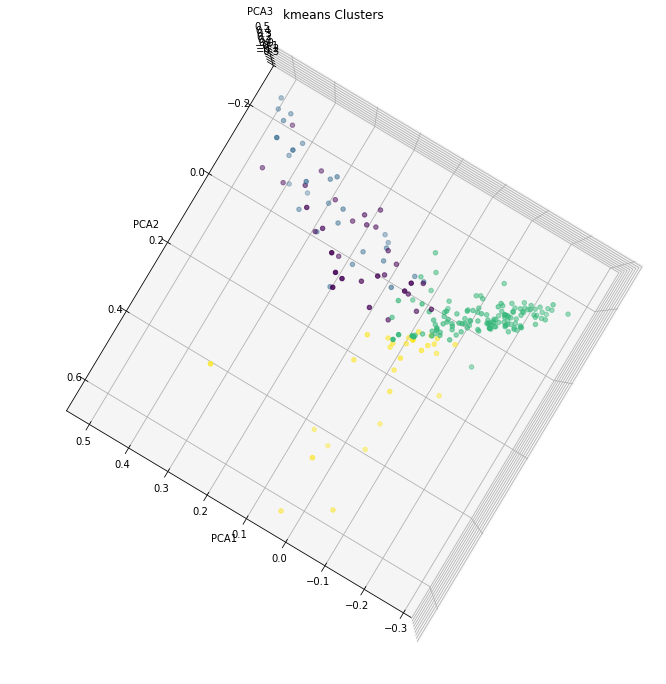

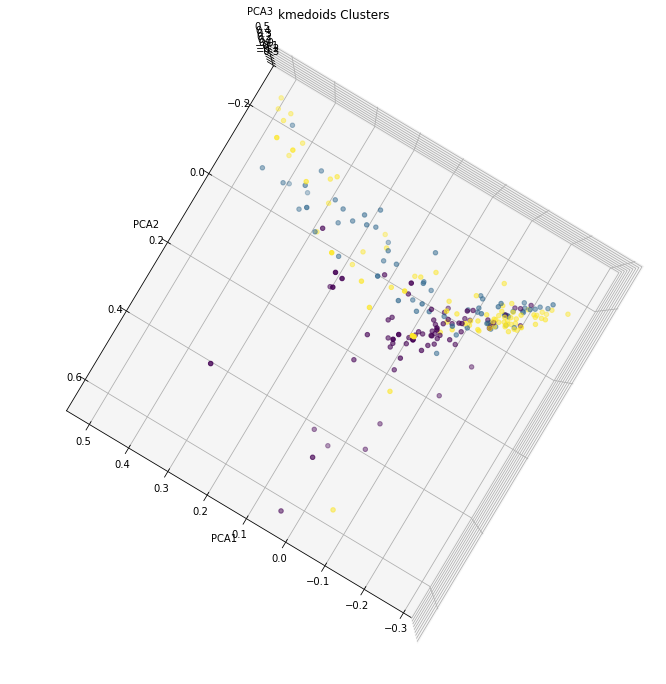

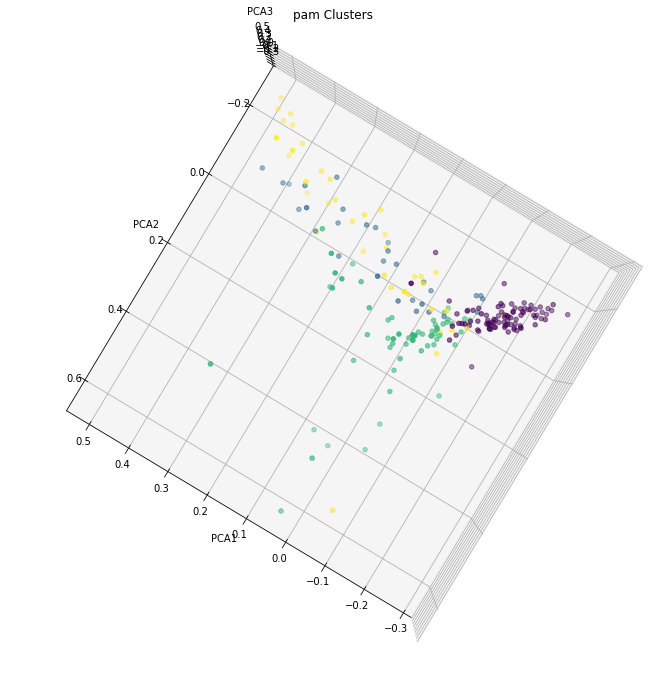

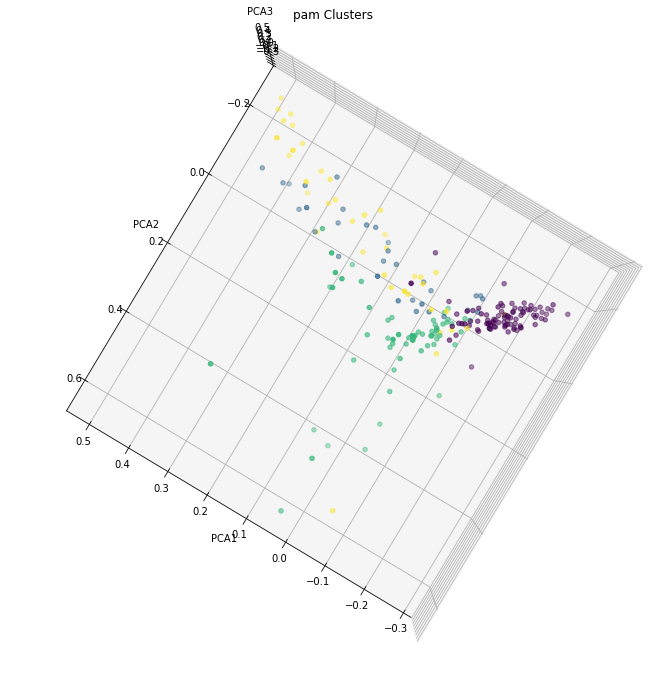

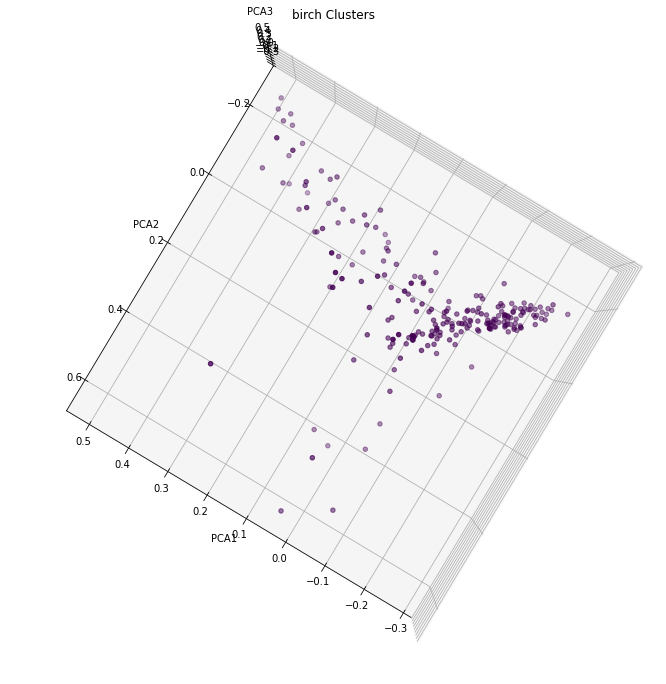

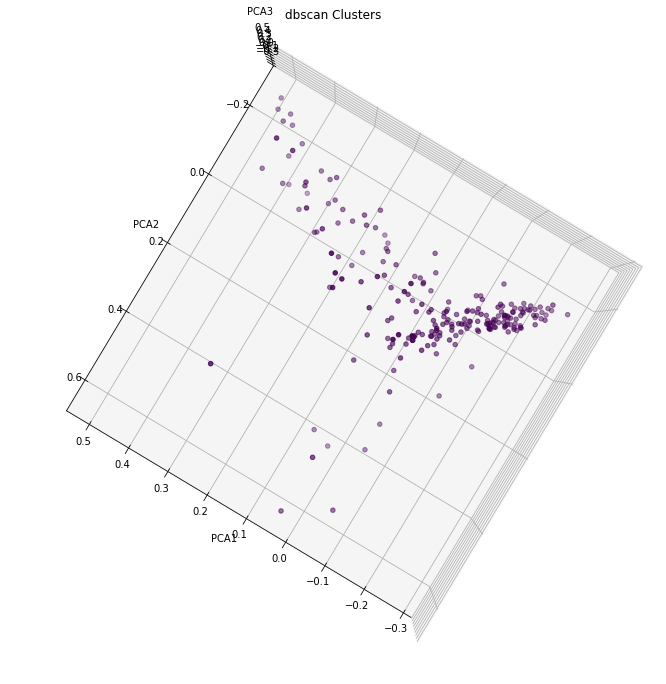

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from summarizer import Summarizer
from mpl_toolkits import mplot3d

model = Summarizer()

for i in range(11):
    try:
        if i == 0:
            title = "kmeans"
            from sklearn.cluster import KMeans
            kmeans = KMeans(n_clusters=4, random_state=0).fit(original)
            preds = kmeans.labels_
        if i == 1:
            title = "kmedoids"
            from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
            kmedoids = KMedoids(n_clusters=4, method = 'alternate' ,random_state=0).fit(original)
            preds = kmedoids.labels_
        if i == 2:
            title = "kmodes"
            from kmodes.kmodes import KModes
            kmode = KModes(n_clusters=4, init = "Huang", n_init = 5, verbose=1)
            preds = kmode.fit_predict(original)
        if i == 3:
            title = "pam"
            from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
            kmedoids = KMedoids(n_clusters=4, method = 'pam' ,random_state=0).fit(original)
            preds = kmedoids.labels_
        if i == 5:
            title = "fcm"
            from fcmeans import FCM
            fcm = FCM(n_clusters=4)
            fcm.fit(np.array(text_vec))
            preds = fcm.predict(np.array(original))
        if i == 6:
            title = "agnes"
            from sklearn.cluster import AgglomerativeClustering
            preds = AgglomerativeClustering(n_clusters=4,linkage='complete').fit_predict(original)
        if i == 7:
            title = "birch"
            from sklearn.cluster import Birch  
            birch = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)
            birch.fit(text_vec)
            preds = birch.predict(original)
        if i == 8:
            title = "gmm"
            from sklearn.mixture import GaussianMixture
            gmm = GaussianMixture(n_components=4)
            gmm.fit(text_vec)
            preds = gmm.predict(original)
        if i == 9:
            title = "dbscan"
            from sklearn.cluster import DBSCAN
            preds = DBSCAN(eps=10, min_samples=10).fit_predict(original)
        if i == 10:
            title = "optics"
            from sklearn.cluster import OPTICS
            preds = OPTICS(min_samples=5).fit_predict(original)
    except:
        continue

    
    # reduce the features to 2D
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(original.todense())#.toarray())
    reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
    a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.scatter3D(a1, a2, a3, c=preds)
    ax.view_init(90, 120)
    plt.title(title + " Clusters")
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.savefig(title + 'original.png')
    
    x_original['labels_'+title] = preds
    # print(type(x))
    body1 = ''
    body2 = ''
    body3 = ''
    body4 = ''
    for i in range(len(x_original)):
        if x_original.iloc[i]['labels_'+title] == 0:
            body1 = body1 + " " + x_original.iloc[i]['Rationale']
        elif x_original.iloc[i]['labels_'+title] == 1:
            body2 = body2 + " " + x_original.iloc[i]['Rationale']
        elif x_original.iloc[i]['labels_'+title] == 2:
            body3 = body3 + " " + x_original.iloc[i]['Rationale']
        elif x_original.iloc[i]['labels_'+title] == 3:
            body4 = body4 + " " + x_original.iloc[i]['Rationale']
        elif x_original.iloc[i]['labels_'+title] == -1:
            body4 = body4 + " " + x_original.iloc[i]['Rationale']
    
    result1 = model(body1,num_sentences=5)
    result2 = model(body2,num_sentences=5)
    result3 = model(body3,num_sentences=5)
    result4 = model(body4,num_sentences=5)
    
    file = open("summaries_original_"+title+".txt", "w")
    file.write("SUMMARY 0\n")
    file.write(result1 +"\n\n")
    file.write("SUMMARY 1\n")
    file.write(result2 +"\n\n")
    file.write("SUMMARY 2\n")
    file.write(result3 +"\n\n")
    file.write("SUMMARY 3/-1\n")
    file.write(result4 +"\n\n")
    file.close()

Text(0.5, 0.92, 'Original Clusters')

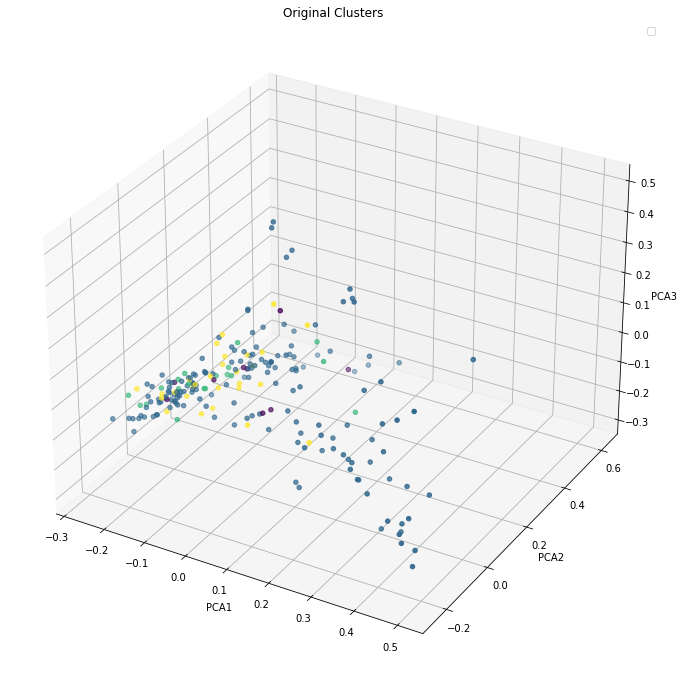

In [60]:
#With original scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from summarizer import Summarizer
from sklearn.cluster import DBSCAN

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(original.todense())
color_dict = { 0.0:0, 0.5:1, 1.0:2, 1.5:3}
#plt.scatter(reduced_features[:,0], reduced_features[:,1],c = [color_dict[i] for i in x['Rationale Points(1.5)']])
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = [color_dict[i] for i in x_original['Rationale Points']])
# ax.view_init(45, 90)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.savefig('Original Clusters for All Scores' + '.png')
plt.legend()
plt.title("Original Clusters")

Text(0.5, 0.92, 'Original Clusters')

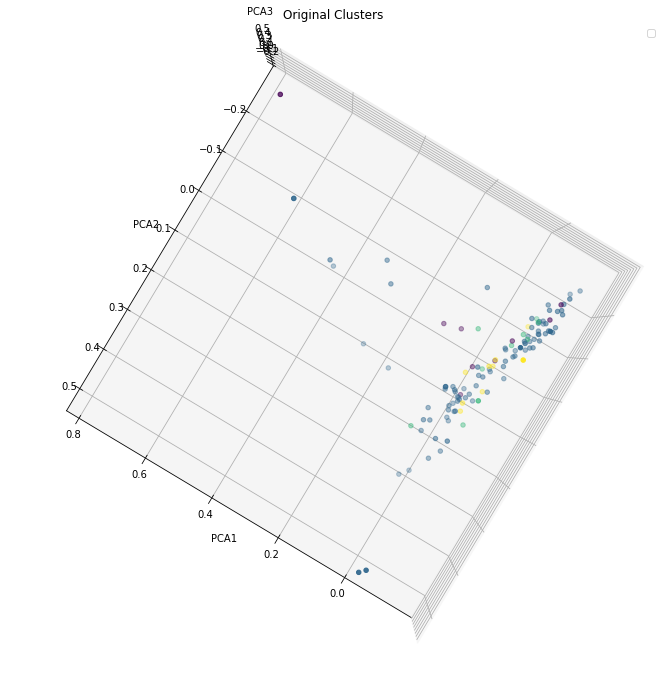

In [61]:
#With removed similar scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from summarizer import Summarizer
from sklearn.cluster import DBSCAN

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(text_vec)
color_dict = { 0.0:0, 0.5:1, 1.0:2, 1.5:3}
#plt.scatter(reduced_features[:,0], reduced_features[:,1],c = [color_dict[i] for i in x['Rationale Points(1.5)']])
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = [color_dict[i] for i in x['Rationale Points']])
ax.legend()
ax.view_init(90, 120)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.savefig('Original Clusters for Less Similar Scores' + '.png')

plt.title("Original Clusters")

#model = Summarizer()

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(text_vec)
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']


title = "DBSCAN"
preds = DBSCAN(eps=2.5, min_samples=10).fit_predict(text_vec)
# from sklearn.cluster import OPTICS
# preds = OPTICS(min_samples=4).fit_predict(text_vec)

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, random_state=0).fit(text_vec)
# preds = kmeans.labels_

# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
    
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = preds)
ax.view_init(90,120)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
# plt.savefig(title + '.png')
plt.title(title + " Clusters")

#plt.savefig(title + '.png')

x['labels_'+title] = preds

body1 = ''
body2 = ''
body3 = ''
body4 = ''
for i in range(len(x)):
    if x.iloc[i]['labels_'+title] == 0:
        body1 = body1 + " " + x.iloc[i]['Rationale']
    elif x.iloc[i]['labels_'+title] == 1:
        body2 = body2 + " " + x.iloc[i]['Rationale']
    elif x.iloc[i]['labels_'+title] == 2:
        body3 = body3 + " " + x.iloc[i]['Rationale']
    elif x.iloc[i]['labels_'+title] == 3:
        body4 = body4 + " " + x.iloc[i]['Rationale']
    elif x.iloc[i]['labels_'+title] == -1:
        body4 = body4 + " " + x.iloc[i]['Rationale']

result1 = model(body1,num_sentences=5)
result2 = model(body2,num_sentences=5)
result3 = model(body3,num_sentences=5)
result4 = model(body4,num_sentences=5)

file = open("temp_summaries_"+title+".txt", "w")
file.write("SUMMARY 0\n")
file.write(result1 +"\n\n")
file.write("SUMMARY 1\n")
file.write(result2 +"\n\n")
file.write("SUMMARY 2\n")
file.write(result3 +"\n\n")
file.write("SUMMARY 3/-1\n")
file.write(result4 +"\n\n")
file.close()

print("Done.")

In [62]:
x.groupby("labels_kmeans").count()

,index,MCQ Response,Rationale,Total,MCQ Points,Rationale Points,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics
labels_kmeans,,,,,,,,,,,,,,,
0,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
1,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
3,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


In [63]:
x.groupby('Rationale Points').count()

,index,MCQ Response,Rationale,Total,MCQ Points,labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics
Rationale Points,,,,,,,,,,,,,,,
0.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
0.5,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
1.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1.5,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [64]:
# x_original.groupby("labels_dbscan").count()

In [65]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from summarizer import Summarizer

# title = "clarans"
# from pyclustering.cluster.clarans import clarans
# clara_instance = clarans(text_vec, 4, 1, 5)
# clara_instance.process()
# clusters = clara_instance.get_clusters()
# preds = [0]*1082
# for j in range(4):
#     for i in clusters[j]:
#         preds[i] = j


# # reduce the features to 2D
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())
# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
# plt.title(title + " Clusters")
# plt.savefig(title + '.png')

# x['labels_'+title] = preds

# body1 = ''
# body2 = ''
# body3 = ''
# body4 = ''
# for i in range(len(x)):
#     if x.iloc[i]['labels_'+title] == 0:
#         body1 = body1 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 1:
#         body2 = body2 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 2:
#         body3 = body3 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 3:
#         body4 = body4 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == -1:
#         body4 = body4 + " " + x.iloc[i]['Explanation for question 12 here']
            
# model = Summarizer()

# result1 = model(body1,num_sentences=5)
# result2 = model(body2,num_sentences=5)
# result3 = model(body3,num_sentences=5)
# result4 = model(body4,num_sentences=5)

# file = open("summaries_"+title+".txt", "w")
# file.write("SUMMARY 0\n")
# file.write(result1 +"\n\n")
# file.write("SUMMARY 1\n")
# file.write(result2 +"\n\n")
# file.write("SUMMARY 2\n")
# file.write(result3 +"\n\n")
# file.write("SUMMARY 3/-1\n")
# file.write(result4 +"\n\n")
# file.close()

# x.to_csv("preds for clarans q7 tut1")

In [66]:
# import collections
# frequency = collections.Counter(preds)
# print(dict(frequency))

In [67]:
# from pyclustering.cluster.clique import clique
# # create CLIQUE algorithm for processing
# intervals = 1  # defines amount of cells in grid in each dimension
# threshold = 0   # lets consider each point as non-outlier
# clique_instance = clique(text_vec, intervals, threshold)
 
# # start clustering process and obtain results
# clique_instance.process()
# clusters = clique_instance.get_clusters()  # allocated clusters
# # noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
# # cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid



# from pyclustering.cluster.fcm import fcm
# from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
# # initialize
# initial_centers = kmeans_plusplus_initializer(text_vec, 2, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
 
# # create instance of Fuzzy C-Means algorithm
# fcm_instance = fcm(text_vec, initial_centers)
 
# # run cluster analysis and obtain results
# fcm_instance.process()
# clusters = fcm_instance.get_clusters()

# !pip install fuzzy-c-means
# from fcmeans import FCM
# fcm = FCM(n_clusters=4)
# fcm.fit(np.array(text_vec))
# preds = fcm.predict(np.array(text_vec))

In [68]:
# clusters = clara_instance.get_clusters()

In [69]:
#model.process()
# len(clusters)

In [70]:
# preds = [0]*1082
# # clus = model.get_clusters()
# for j in range(4):
#     for i in clusters[j]:
#         preds[i] = j


In [71]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # reduce the features to 2D
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

# # reduce the cluster centers to 2D
# #reduced_cluster_centers = pca.transform(cls.cluster_centers_)


# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
# plt.title("CLARANS Clusters")
# #plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [72]:
# x['labels'] = preds

In [73]:
# x.groupby('Points - Question 12 - CO4.1').count()

In [74]:
# x.groupby('labels').count()

In [75]:
# !pip install bert-extractive-summarizer
# !pip install neuralcoref
# !pip install spacy

In [76]:
# from summarizer import Summarizer

# body1 = ''
# body2 = ''
# body3 = ''
# body4 = ''
# for i in range(len(x)):
#     if x.iloc[i]['labels'] == 0:
#         body1 = body1 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 1:
#         body2 = body2 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 2:
#         body3 = body3 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 3:
#         body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        
# model = Summarizer()

# result1 = model(body1,num_sentences=5)
# #body1_vec = model.run_embeddings(body1, num_sentences=5)

# result2 = model(body2,num_sentences=5)
# #body2_vec = model.run_embeddings(body2, num_sentences=5)

# result3 = model(body3,num_sentences=5)
# #body3_vec = model.run_embeddings(body3, num_sentences=5)

# result4 = model(body4,num_sentences=5)
# #body4_vec = model.run_embeddings(body4, num_sentences=5)

In [77]:
# result4

In [78]:
# correct_answer = "Among the given options Only option that can be quantifiable is about the number of people entering the airport. Other options are subjective to the situation which are not actually quantifiable"
# #correct_answer_vec = model.run_embeddings(correct_answer, ratio=1)

In [79]:
# body1_vec.shape

In [80]:
# !pip install gensim

In [81]:
# from sklearn.metrics.pairwise import cosine_similarity
# #let's calculate cosine similarity for sentence 0:
# cosine_similarity(
#     body1_vec,correct_answer_vec)

In [82]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# doc = nlp(correct_answer)
# doc1 = nlp(result1)
# doc2 = nlp(result2) 
# doc3 = nlp(result3)
# doc4 = nlp(result4)

# print (doc.similarity(doc1)) 
# print (doc.similarity(doc2))
# print (doc.similarity(doc3))
# print (doc.similarity(doc4))

In [83]:
# x = pd.read_csv("../input/predictionscluster-labels/preds for all q12 tut1.csv")
# x.drop("Unnamed: 0" ,axis=1,inplace=True)

In [84]:
# x.head(1)

In [85]:
# x.groupby('Points - Question 12 - CO4.1').count()

In [86]:
x.groupby('Rationale Points').count()

,index,MCQ Response,Rationale,Total,MCQ Points,labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics
Rationale Points,,,,,,,,,,,,,,,
0.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
0.5,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
1.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1.5,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [87]:
#x.loc[x['labels_dbscan'] == x['labels_DBSCAN']].shape

In [88]:
# x.shape

In [89]:
import random
assigned_score = []
for i in x['labels_kmeans']:
    #print(i)
    if i == 0:
        assigned_score.append(0.5)
    elif i == 1:
        assigned_score.append(0.0)
    elif i ==2:
        assigned_score.append(1.0)
    else:
        assigned_score.append(1.5)

In [90]:
x['kmeans_assigned_score'] = assigned_score

In [91]:
x.head(10)

,index,MCQ Response,Rationale,Total,MCQ Points,Rationale Points,labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics,kmeans_assigned_score
3,3,In Row1 : 2 and Row 2: 4,"In row1:2 since 4,1 cannot be placed due to re...",1.0,0.0,1.0,3,3,0,3,3,0,0,3,0,0,1.5
8,8,In Row1 : 2 and Row 2: 3,"Pattern recognition, because we get the soluti...",2.0,1.5,0.5,3,1,0,1,1,0,0,3,0,0,1.5
10,10,In Row1 : 2 and Row 2: 3,it is similar to sudoko problem by pattern rec...,2.0,1.5,0.5,2,2,0,2,1,0,0,0,0,0,1.0
12,12,In Row1 : 2 and Row 2: 3,pattern recognition is the key to solve the qu...,3.0,1.5,1.5,2,2,0,2,1,0,0,2,0,0,1.0
13,13,In Row1 : 2 and Row 2: 3,for first row: if we see first row and first c...,2.0,1.5,0.5,0,3,0,3,3,0,0,2,0,0,0.5
17,17,In Row1 : 2 and Row 2: 3,Abstraction.,1.5,1.5,0.0,1,0,0,0,2,2,0,1,0,0,0.0
19,19,In Row1 : 2 and Row 2: 3,"Pattern Recognition, Because to find the unkno...",2.0,1.5,0.5,3,2,0,2,1,0,0,1,0,0,1.5
23,23,In Row1 : 2 and Row 2: 3,when we put 2 in row 1 and 3 in row 2 then in ...,2.0,1.5,0.5,3,3,0,3,3,0,0,3,0,0,1.5
24,24,In Row1 : 2 and Row 2: 3,"As (4,1) is 4 (1,4) should be equal to 4. So,...",2.0,1.5,0.5,0,3,0,3,3,0,0,0,0,0,0.5
25,25,In Row1 : 1 and Row 2: 3,"(0,0) cell consists only 2 based on the cell i...",1.0,0.0,1.0,3,0,0,0,2,0,0,3,0,0,1.5


In [92]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(x['Points - Question 12 - CO4.1'], x['kmeans_assigned_score'])

In [93]:
f = open('summaries_kmeans.txt', 'r')

In [94]:
f.read()

"SUMMARY 0\nfor first row: if we see first row and first column, 1,3,4 are present so, 2 is correct for the vacant place._x000D_\nfor second row: by filling all elements in row 1, (1,4) is 4. in this latin square _x000D_\nif in row 1 we put 2 , then (i,j)=(j,i)_x000D_\nso (1,1)_x000D_\nand if in row 2 we put 3 then (i,j)=(j,i) _x000D_\n(2,4) i.e, (4,2) _x000D_\nso finally it satisfies the condition mentioned in the question. After filling first row and first column, it is thoughtful to fill the remaining boxes without repetition . x000D_\nPattern recognition - Looking for non repeating numbers in the respective rows and columns_x000D_\n It is 2 in Row 1 and 3 in Row 2 because in a Latin square, each element occurs exactly once in a row and once in a column. in row 1 only 2 doesn't occur in the same column and row.\n\nSUMMARY 1\nIf we put Row1 as 2 and row2 as 3 no two numbers will be repeating in same row and same column. _ x000D_\nPattern recognition and abstraction. Abstraction  -  W

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print(classification_report(x['kmeans_assigned_score'].astype("str"), x['Rationale Points'].astype("str"), digits = 3))
#accuracy_score(x['Rationale Points(1.5)'].astype("str"), x['dbscan_assigned_score'].astype("str"))

              precision    recall  f1-score   support

         0.0      0.500     0.385     0.435        13
         0.5      0.376     0.761     0.504        46
         1.0      0.300     0.088     0.136        34
         1.5      0.111     0.034     0.053        29

    accuracy                          0.361       122
   macro avg      0.322     0.317     0.282       122
weighted avg      0.305     0.361     0.287       122



In [96]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(x['Rationale Points'].astype("str"), x['kmeans_assigned_score'].astype("str"))

0.03635443037974684

In [97]:
# indices = [14,15,19,20,26,34,48,56,64,69,80,84,96,105,107,112,120,126,151,188,190,196,197,200,215,216,223,232,239,268,275,281,286,323,325,329,335,337,345,355,367,370,379,380,383,384,386,415,424,427,428,431,435,437,445,452,464,477,494,500,502,518,523,568,573,579,584,592,604,610,642,652,655,657,674,684,705,709,717,724,751,753,770,778,779,800,812,813,818,824,825,830,835,839,860,905,925,927,946,949,950,973,977,979,993,1012,1013,1014,1036,1038,1047,1048,1049,1057,1060] 
# for i in indices:
#      x['dbscan_assigned_score'].iloc[i] = x['Rationale Points(1.5)'].iloc[i]

In [98]:
mismatch = x[x['Rationale Points'] != x['kmeans_assigned_score']]

In [99]:
mismatch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 3 to 227
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  78 non-null     int64  
 1   MCQ Response           78 non-null     object 
 2   Rationale              78 non-null     object 
 3   Total                  78 non-null     float64
 4   MCQ Points             78 non-null     float64
 5   Rationale Points       78 non-null     float64
 6   labels_kmeans          78 non-null     int32  
 7   labels_kmedoids        78 non-null     int64  
 8   labels_kmodes          78 non-null     uint16 
 9   labels_pam             78 non-null     int64  
 10  labels_fcm             78 non-null     int64  
 11  labels_agnes           78 non-null     int64  
 12  labels_birch           78 non-null     int64  
 13  labels_gmm             78 non-null     int64  
 14  labels_dbscan          78 non-null     int64  
 15  labels_

In [100]:
x.to_excel("clusters and scores.xlsx")

In [101]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y = label_binarize(x['Rationale Points'].astype("str"), classes=['0.0', '0.5', '1.0', '1.5'])
y_dbscan = label_binarize(x['kmeans_assigned_score'].astype("str"), classes=['0.0', '0.5', '1.0', '1.5'])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_dbscan[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_dbscan.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

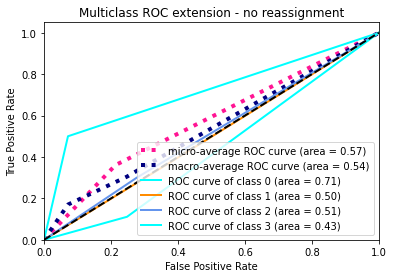

In [102]:
lw = 2
n_classes=4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC extension - no reassignment')
plt.legend(loc="lower right")
plt.show()

In [103]:
print(classification_report([0,1,2,1,1,2,0], [0,3,2,1,1,0,0], digits = 3))
cohen_kappa_score([0,1,2,1,1,2,0], [0,3,2,1,1,0,0])

              precision    recall  f1-score   support

           0      0.667     1.000     0.800         2
           1      1.000     0.667     0.800         3
           2      1.000     0.500     0.667         2
           3      0.000     0.000     0.000         0

    accuracy                          0.714         7
   macro avg      0.667     0.542     0.567         7
weighted avg      0.905     0.714     0.762         7



0.6

In [104]:
# # from statsmodels.stats.inter_rater import fleiss_kappa
# # z = [x['Rationale Points(1.5)'], x['assigned_score']]
# # fleiss_kappa(z, method='fleiss')

# from nltk import agreement
# # formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] + [[2,i,coder2[i]] for i in range(len(coder2))]  + [[3,i,coder3[i]] for i in range(len(coder3))]
# formatted_codes = [[1 , i, x.iloc[i]['Rationale Points(1.5)'].astype("str")] for i in range(len(x))] + [[2,i,x.iloc[i]['kmedoids_assigned_score'].astype("str")] for i in range(len(x))]


# ratingtask = agreement.AnnotationTask(data=formatted_codes)

# print('Fleiss\'s Kappa:',ratingtask.multi_kappa())

### J=sensitivity+specificity−1   

In [105]:
# from sklearn.metrics import confusion_matrix
# import math

# cnf_matrix = confusion_matrix(x['Points - Question 12 - CO4.1'].astype("str"), x['kmeans_assigned_score'].astype("str"))
# # print(cnf_matrix)
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)

# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# # print(TP, FP, FN, TN)
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 

# j_stat = TPR+TNR-1
# print(np.mean(j_stat))

In [106]:
# x.to_csv("q7 assigned scores.csv")

In [107]:
# from summarizer import Summarizer

# body = 'The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific). Other options are ambiguous and differs from person to person . out of the four options,the number of people that have entered the air port is the only question which is well defined and quantifiable.'
# #model = Summarizer()
# res = model.calculate_optimal_k(body, k_max=10)
# print(res)

In [108]:
# body = 'The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific). Other options are ambiguous and differs from person to person . out of the four options,the number of people that have entered the air port is the only question which is well defined and quantifiable.'
# model.cluster_runner([1],body)

In [109]:
# res = model.calculate_elbow(body, k_max=10)
# print(res)

In [110]:
# og_preds = list(x['Rationale Points(1.5)'].astype("str"))
# for i in range(len(og_preds)):
#     if og_preds[i] == '1.5':
#         og_preds[i] = 0
#     if og_preds[i] == '1.0' or og_preds[i] == '1' :
#         og_preds[i] = 1
#     if og_preds[i] == '0.5':
#         og_preds[i] = 2
#     if og_preds[i] == '0.0' or og_preds[i] == '0':
#         og_preds[i] = 3